# Travel Demand Trends to Tech Hubs Using the Amadeus API (EDA and Hypothesis testing)

In this notebook, we carry out an in-depth exploratory and descriptive analysis of the Travel Demand Dataset, a widely used dataset for building a prototype data pipeline using the Amadeus API to fetch flight and hotel data, analyze travel trends to these destinations, and provide recommendations for travel brands.

This phase of analysis is essential for uncovering patterns, detecting potential biases, and gaining intuition about the dataset’s structure before applying any modelling procedures. We examine the distribution of key numerical and categorical variable,  visualizations to summarize insights. Particular focus is placed ontravel demands across **San Francisco,London, Bangalore, Singapore, and Tel Avivs ,price, number_of_stops, travel_time, available_seats** attributes which lay a solid foundation for downstream modeling and policy-relevant interpretation.



We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


## EDA

In [123]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.



In [125]:
# Get working directory 
current_dir = os.getcwd()

# Go one directory up to the root directory 
project_root_dir = os.path.dirname(current_dir)

data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')

# Define paths to results folder 
results_dir = os.path.join(project_root_dir,'results')

# Define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs') 

#Create directories if they do not exist 
os.makedirs(raw_dir,exist_ok= True)
os.makedirs(processed_dir,exist_ok= True)
os.makedirs(results_dir,exist_ok= True)
os.makedirs(data_dir,exist_ok= True)

## Loading the Cleaned Dataset

We load the cleaned version of the travel demand Dataset from the processed data directory into a Pandas DataFrame. The `head(10)` function shows the first ten records, giving a glimpse into the data columns such as `Number of Stops`, `Destination`, `Airline`, etc.


In [127]:
travel_demand_filename = os.path.join(processed_dir, 'Travel_cleaned.csv')
df = pd.read_csv(travel_demand_filename)
df.head(10)

,Destination,Departure Date,Airline,Price (USD),Number of Stops,Travel Time,Available Seats,Travel Time Str
0,San Francisco,2025-07-01,B6,79.90,0,0 days 06:15:00,1,06:15
1,San Francisco,2025-07-01,B6,79.90,0,0 days 06:20:00,1,06:20
2,San Francisco,2025-07-01,B6,79.90,0,0 days 06:35:00,1,06:35
3,San Francisco,2025-07-01,B6,79.90,0,0 days 06:45:00,1,06:45
4,San Francisco,2025-07-01,F9,156.03,1,0 days 05:42:00,3,05:42
5,San Francisco,2025-07-01,F9,156.03,1,0 days 02:55:00,3,02:55
6,San Francisco,2025-07-01,F9,160.88,1,0 days 04:01:00,3,04:01
7,San Francisco,2025-07-01,F9,160.88,1,0 days 02:28:00,3,02:28
8,San Francisco,2025-07-01,F9,160.88,1,0 days 05:42:00,3,05:42
9,San Francisco,2025-07-01,B6,215.15,1,0 days 03:17:00,1,03:17


## Dataset Dimensions and Data Types

Here, we examine the structure of the dataset:

- There are *7,870* entries and *8* variables.
- The dataset includes both **numerical** (e.g., `Price (USD)`, `Travel Time`) and **categorical** variables (e.g., `Airline`, `Destination`).

Understanding data types and null entries is essential before proceeding with analysis.


In [129]:
df.shape

(7870, 8)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Destination      7870 non-null   object 
 1   Departure Date   7870 non-null   object 
 2   Airline          7870 non-null   object 
 3   Price (USD)      7870 non-null   float64
 4   Number of Stops  7870 non-null   int64  
 5   Travel Time      7870 non-null   object 
 6   Available Seats  7870 non-null   int64  
 7   Travel Time Str  7870 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 492.0+ KB


In [131]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Price (USD) '] = df['Price (USD) '].replace('[\$,]', '', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_14496\1797763082.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Price (USD) '] = df['Price (USD) '].replace('[\$,]', '', regex=True).astype(float)


In [132]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Destination      7870 non-null   object        
 1   Departure Date   7870 non-null   datetime64[ns]
 2   Airline          7870 non-null   object        
 3   Price (USD)      7870 non-null   float64       
 4   Number of Stops  7870 non-null   int64         
 5   Travel Time      7870 non-null   object        
 6   Available Seats  7870 non-null   int64         
 7   Travel Time Str  7870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 492.0+ KB


## Summary Statistics: Numerical Variables

These variables represent measurable quantities used for computations, aggregations, and visualizations such as bar charts, scatterplots, or boxplots.

**Number of Stops**
This column indicates how many stops a flight has (e.g., 0 for nonstop, 1, or 2). It is a discrete numeric variable, often used in categorization and to study its impact on price or travel time. Most flights in the dataset have exactly 1 stop.

**Available Seats**
This variable shows the number of seats still available on a given flight. It is a count-based integer feature, useful for understanding booking trends and demand. The typical flight has between 7 to 9 seats available.

**Price (USD)**
This column records the price of each flight in US dollars. It is a continuous numeric variable with values ranging from as low as 79.9 to  over   17,000. It's essential for analyzing cost differences between destinations, airlines, and travel conditions.

**Departure Date**
While this column is stored in datetime format, it has both numeric (timestamp) and temporal (calendar) significance. It allows for filtering flights by day, week, or month and enables time-based trend analysis. In this project, the focus is only on flights departing in **July**.


In [134]:
df.describe()

,Departure Date,Price (USD),Number of Stops,Available Seats
count,7870,7870.000000,7870.000000,7870.000000
mean,2025-07-14 13:16:28.970775040,871.942412,0.995172,7.189835
min,2025-07-01 00:00:00,79.900000,0.000000,1.000000
25%,2025-07-08 00:00:00,398.430000,1.000000,7.000000
50%,2025-07-15 00:00:00,563.670000,1.000000,9.000000
75%,2025-07-21 00:00:00,922.370000,1.000000,9.000000
max,2025-07-28 00:00:00,17408.880000,2.000000,9.000000
std,NaN,1088.171661,0.576118,2.728732


## Summary Statistics: Categorical Variables

These variables represent distinct groups or categories useful for segmentation and group comparisons.

**Destination**
This column specifies the city or tech hub to which the flight is headed (e.g., London, Tel Aviv, Bangalore). It helps segment the data geographically for price, availability, or demand comparisons. There are 5 unique destinations in the dataset.

**Airline**
This field lists the airline operating each flight (e.g., B6, Delta, Emirates). With 53 unique airlines, it provides an opportunity to assess performance and pricing differences across carriers. It can also help identify popular or dominant airline routes.

**Travel Time**
This column captures the total flight duration in timedelta format. It is numeric in nature but often converted into minutes or hours for analysis. It plays a key role in visualizing travel efficiency and correlations with stops or prices.

**Travel Time Str**
This column is a string-formatted version of the `Travel Time` column, displayed as `HH:MM`. It is not numeric but useful for visual labeling and grouping similar flight durations. While not used for calculations, it aids readability in charts and summaries.


In [136]:
df.describe(include='object')

,Destination,Airline,Travel Time,Travel Time Str
count,7870,7870,7870,7870
unique,5,53,122,122
top,London,B6,0 days 07:55:00,07:55
freq,2920,870,460,460


In [137]:
df.columns = df.columns.str.strip()


## Visualisation

### Average Flight Prices to Tech Hubs

This chart displays the average flight prices from New York (JFK) to selected global tech hubs, based on live data from the Amadeus API. We grouped the data by destination and calculated the mean price for each city.

The horizontal bar chart ranks destinations from most to least expensive, helping identify which cities are more costly to fly to on average. This insight is useful for travel brands assessing pricing trends and customer affordability across regions.


C:\Users\USER\AppData\Local\Temp\ipykernel_14496\4186916910.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='Greens')


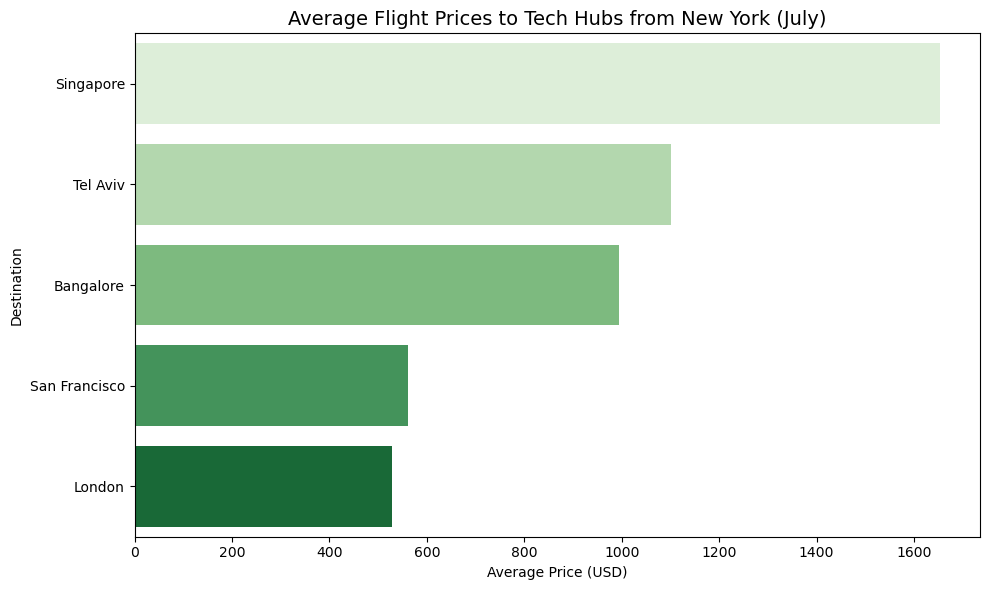

In [140]:
#| label: q1-average-price-bar
#| fig-cap: "Average Flight Prices to Tech Hubs from New York"
#| echo: true

# Group and calculate mean price by destination
avg_prices = df.groupby('Destination')['Price (USD)'].mean().sort_values(ascending=False)

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='Greens')

# Add titles and labels
plt.title('Average Flight Prices to Tech Hubs from New York (July)', fontsize=14)
plt.xlabel('Average Price (USD)')
plt.ylabel('Destination')
plt.tight_layout()

plt.savefig(os.path.join(results_dir, 'average_flight_prices_by_destination.png'))
plt.savefig(os.path.join(results_dir, 'average_flight_prices_by_destination.jpg'))
plt.show()


In [141]:
df['Travel Time'].dtype


dtype('O')

In [142]:
df['Travel Time'] = pd.to_timedelta(df['Travel Time'], errors='coerce')


###  Flight Price vs. Travel Time

This scatterplot explores the relationship between **travel time** and **flight price** for each destination. Travel time was converted to minutes for consistency.

Each point represents a flight offer, colored by destination. The plot helps identify whether longer flights tend to be cheaper and if certain cities consistently show higher or lower prices relative to travel duration.

This analysis provides insight into trade-offs between cost and convenience, which can inform traveler preferences and airline pricing strategies.


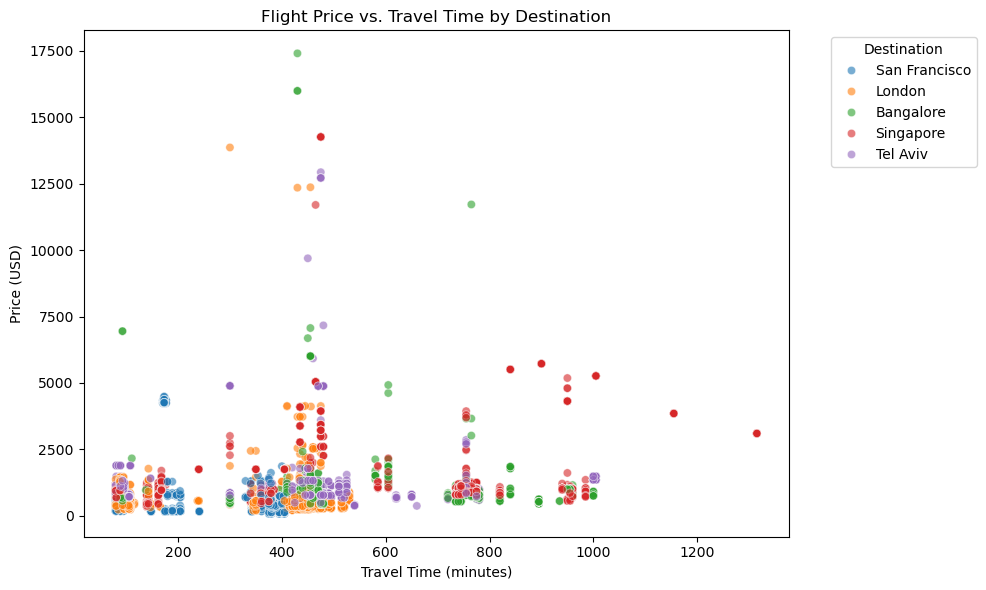

In [144]:
#| label: q2a-scatter-travel-time-vs-price
#| fig-cap: "Flight Price vs. Travel Time by Destination"
#| echo: true

# Convert Travel Time to minutes
df['Travel Time (min)'] = df['Travel Time'].dt.total_seconds() / 60

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Travel Time (min)', y='Price (USD)', hue='Destination', alpha=0.6)

# Labels and formatting
plt.title('Flight Price vs. Travel Time by Destination')
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Price (USD)')
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "scatter_price_vs_travel_time.png"))
plt.savefig(os.path.join(results_dir, "scatter_price_vs_travel_time.jpg"))
plt.show()


###  Flight Stop Distribution per Destination

This grouped bar chart shows how flights to each tech hub are distributed by number of stops: **nonstop**, **1 stop**, or **2+ stops**. The data is grouped by destination and categorized for clarity.

The visualization highlights how common layovers are for each city, helping us understand the **convenience** of available routes. For example, some destinations may have mostly nonstop options, while others often require multiple connections.

This insight is valuable for analyzing traveler comfort and route competitiveness.


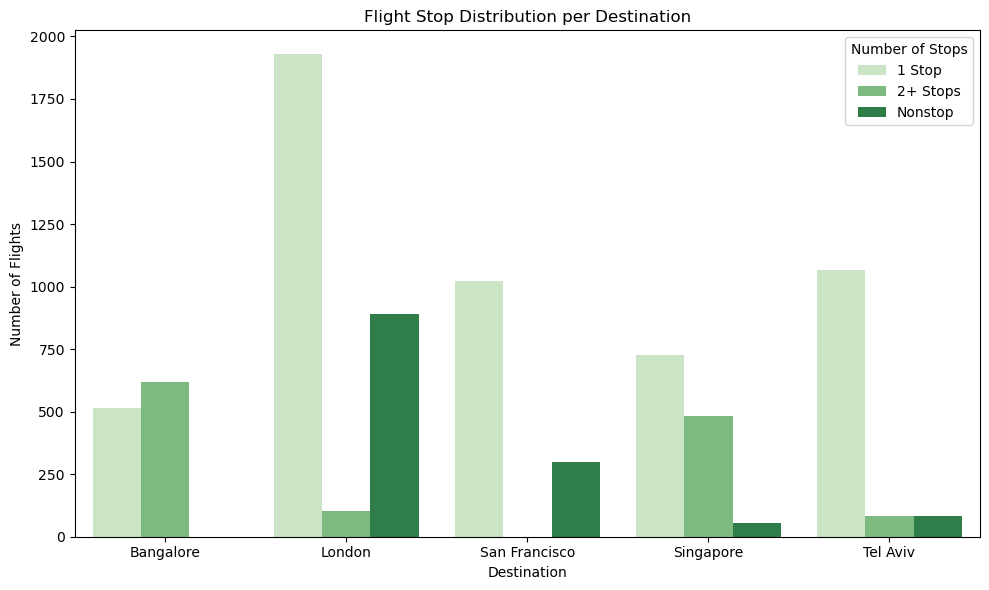

In [146]:
#| label: q2b-bar-stops-per-city
#| fig-cap: "Flight Stop Distribution per Destination"
#| echo: true

# Map Number of Stops to categories for clarity
df['Stop Type'] = df['Number of Stops'].map({
    0: 'Nonstop',
    1: '1 Stop',
    2: '2+ Stops'
})

# Group data by Destination and Stop Type, counting flights
stop_counts = df.groupby(['Destination', 'Stop Type']).size().reset_index(name='Count')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=stop_counts, x='Destination', y='Count', hue='Stop Type', palette='Greens')

# Labels and title
plt.title('Flight Stop Distribution per Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.legend(title='Number of Stops')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, "bar_flight_stops_per_city.png"))
plt.savefig(os.path.join(results_dir, "bar_flight_stops_per_city.jpg"))
plt.show()


explanations

## Average Flight Prices Over Time for Each Destination
This line chart shows how average flight prices to each tech hub fluctuate over time. Tracking prices over multiple dates helps identify seasonal trends, demand spikes, or dips, which is useful for customers planning trips and for airlines adjusting pricing strategies.

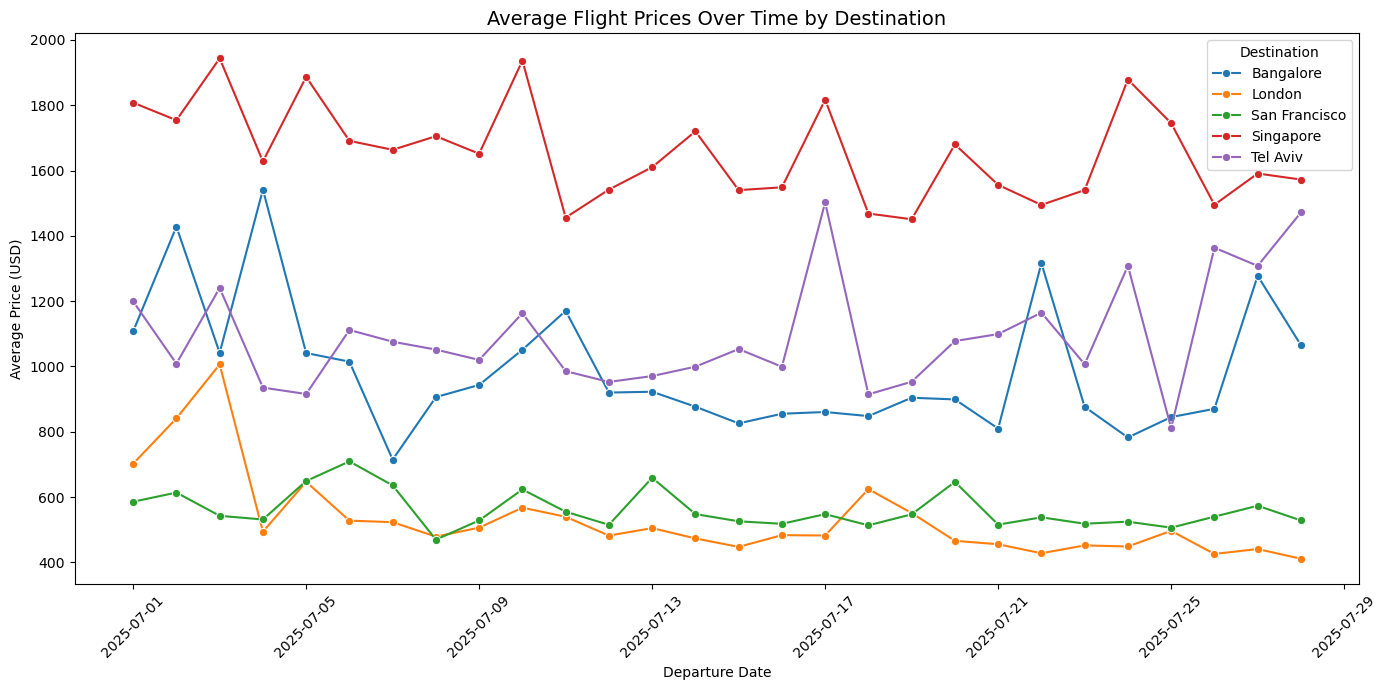

In [149]:
#| label: q5-price-trends-over-time
#| fig-cap: "Average Flight Prices Over Time for Each Destination"
#| echo: true

# Convert Departure Date to datetime if not already
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Calculate average price by date and destination
price_trends = df.groupby(['Departure Date', 'Destination'])['Price (USD)'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=price_trends, x='Departure Date', y='Price (USD)', hue='Destination', marker='o', palette='tab10')
plt.title('Average Flight Prices Over Time by Destination', fontsize=14)
plt.xlabel('Departure Date')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(results_dir, 'price_trends_over_time.png'))
plt.savefig(os.path.join(results_dir, 'price_trends_over_time.jpg'))

plt.show()


## Travel Time Distribution by Destination
This boxplot visualizes the spread and median of travel times for flights to each tech hub. It helps identify which cities generally have longer or more variable flight durations, assisting travelers in time planning and expectations.

C:\Users\USER\AppData\Local\Temp\ipykernel_14496\1508326341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Destination', y='Travel Time', palette='pastel')


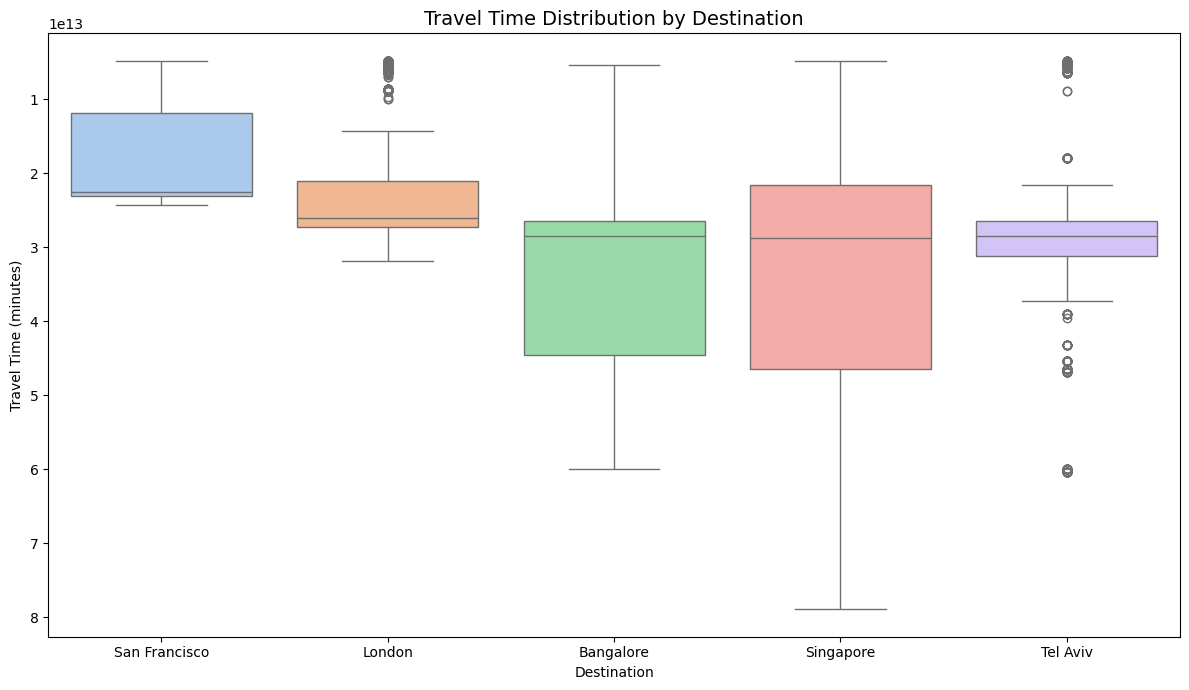

In [151]:
#| label: q7-travel-time-distribution
#| fig-cap: "Distribution of Travel Times by Destination"
#| echo: true

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Destination', y='Travel Time', palette='pastel')
plt.title('Travel Time Distribution by Destination', fontsize=14)
plt.xlabel('Destination')
plt.ylabel('Travel Time (minutes)')
plt.tight_layout()

plt.savefig(os.path.join(results_dir, 'travel_time_distribution.png'))
plt.savefig(os.path.join(results_dir, 'travel_time_distribution.jpg'))

plt.show()


## Hypothesis test and inference

### Normality Testing of Key Variables
Before performing any hypothesis tests on our flight data, it is crucial to check whether the data meets the assumption of normality. Most parametric tests, such as ANOVA and Pearson correlation, assume that the data follows a normal distribution.

We applied the Shapiro-Wilk test, which is a widely used statistical test for normality, to:

 -Flight prices grouped by destination

 -Flight prices grouped by number of stops

 -Flight price and travel time variables individually

The null hypothesis (H0) of the Shapiro-Wilk test is that the data is normally distributed. A p-value greater than 0.05 means we fail to reject this hypothesis and can assume approximate normality. Conversely, a p-value less than or equal to 0.05 indicates that the data significantly deviates from a normal distribution.

This normality check guides us in choosing the correct statistical tests for further analysis.

In [154]:
import scipy.stats as stats
import pandas as pd

# 1. Normality of Flight Price by Destination
print("Shapiro-Wilk Normality Test for Flight Price by Destination\n")
normality_dest = {}
for city in df['Destination'].unique():
    prices = df[df['Destination'] == city]['Price (USD)']
    stat, p = stats.shapiro(prices)
    normality_dest[city] = p
    print(f"{city}: p-value = {p:.4f}")

print("\n")

# 2. Normality of Flight Price by Number of Stops
print("Shapiro-Wilk Normality Test for Flight Price by Number of Stops\n")
normality_stops = {}
for stop_type in df['Stop Type'].unique():
    prices = df[df['Stop Type'] == stop_type]['Price (USD)']
    stat, p = stats.shapiro(prices)
    normality_stops[stop_type] = p
    print(f"{stop_type}: p-value = {p:.4f}")

print("\n")

# 3. Normality of Travel Time and Price (for correlation)
print("Shapiro-Wilk Normality Test for Travel Time and Flight Price\n")
tt_stat, tt_p = stats.shapiro(df['Travel Time'])
price_stat, price_p = stats.shapiro(df['Price (USD)'])
print(f"Travel Time: p-value = {tt_p:.4f}")
print(f"Price: p-value = {price_p:.4f}")


Shapiro-Wilk Normality Test for Flight Price by Destination

San Francisco: p-value = 0.0000
London: p-value = 0.0000
Bangalore: p-value = 0.0000
Singapore: p-value = 0.0000
Tel Aviv: p-value = 0.0000


Shapiro-Wilk Normality Test for Flight Price by Number of Stops

Nonstop: p-value = 0.0000
1 Stop: p-value = 0.0000
2+ Stops: p-value = 0.0000


Shapiro-Wilk Normality Test for Travel Time and Flight Price

Travel Time: p-value = 0.0000
Price: p-value = 0.0000


C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5258.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7870.
  res = hypotest_fun_out(*samples, **kwds)


### 1. Flight Prices by Destination (Non-Parametric)

#### Research Question  
*Do average flight prices differ by destination?*

#### Hypotheses  
- **H₀:** Flight prices are the same across all destinations.  
- **H₁:** At least one destination has a different average flight price.

#### Test Used  
Kruskal-Wallis H-test

#### Reason for Test  
Normality tests failed for flight prices within each destination group (*p* < 0.05), so a non-parametric test is appropriate.

In [156]:
import scipy.stats as stats

groups = [group["Price (USD)"].dropna() for _, group in df.groupby("Destination")]

stat, p = stats.kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant difference in flight prices across destinations.")
else:
    print("There is no significant difference in flight prices across destinations.")


Kruskal-Wallis statistic: 3719.7202
P-value: 0.0000
There is a significant difference in flight prices across destinations.


#### Conclusion
There is **a significant difference** in flight prices across destinations.  
- Kruskal-Wallis statistic: 3719.7202  
- P-value: 0.0000

#### Recommendation
- Pricing strategies should be tailored for each destination based on significant price variation.
- Consider investigating what factors (e.g., demand, distance, seasonality) drive these differences to optimize revenue and competitiveness.


### 2. Flight Prices by Number of Stops (Non-Parametric)

#### Research Question  
*Do flight prices differ by number of stops (Nonstop, 1 Stop, 2+ Stops)?*

#### Hypotheses  
- **H₀:** Flight prices are similar regardless of number of stops.  
- **H₁:** Flight prices differ depending on the number of stops.

#### Test Used  
Kruskal-Wallis H-test

#### Reason for Test  
Normality tests failed for flight prices within stop groups (*p* < 0.05), so a non-parametric test is appropriate.

In [159]:
import scipy.stats as stats

groups = [group["Price (USD)"].dropna() for _, group in df.groupby("Stop Type")]

stat, p = stats.kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant difference in flight prices across stop types.")
else:
    print("There is no significant difference in flight prices across stop types.")


Kruskal-Wallis statistic: 533.3716
P-value: 0.0000
There is a significant difference in flight prices across stop types.


#### Conclusion
There is **a significant difference** in flight prices across stop types.  
- Kruskal-Wallis statistic: 533.3716  
- P-value: 0.0000

#### Recommendation
- Pricing varies notably by stop type. Nonstop flights may be priced higher due to convenience, while multi-stop flights may be more budget-friendly.
- Use this insight to develop tiered pricing strategies and promotions targeting different traveler segments.
- Analyze customer preferences further to align flight offerings with value expectations.


### 3. Correlation Between Travel Time and Flight Price (Non-Parametric)

#### Research Question  
*Is there a correlation between travel time and flight price?*

#### Hypotheses  
- **H₀:** No correlation between travel time and flight price.  
- **H₁:** A correlation exists between travel time and flight price.

#### Test Used  
Spearman’s Rank Correlation

#### Reason for Test  
Travel time and flight price distributions are not normal (*p* < 0.05), so the non-parametric Spearman correlation is suitable.

In [162]:
import scipy.stats as stats

# Convert 'Travel Time' to total hours (or minutes)
df['Travel_Time_Hours'] = df['Travel Time'].dt.total_seconds() / 3600  

# Spearman correlation between Travel Time and Price
corr, p_corr = stats.spearmanr(df['Travel_Time_Hours'], df['Price (USD)'])

print(f"Spearman correlation coefficient: {corr:.4f}")
print(f"P-value: {p_corr:.4f}")

if p_corr < 0.05:
    print("There is a significant monotonic relationship between travel time and price.")
else:
    print("There is no significant monotonic relationship between travel time and price.")


Spearman correlation coefficient: 0.3262
P-value: 0.0000
There is a significant monotonic relationship between travel time and price.


#### Conclusion
There is **a significant monotonic relationship** between travel time and flight price.  
- Spearman correlation coefficient: 0.3262  
- P-value: 0.0000

#### Recommendation
- As travel time increases, flight prices tend to rise moderately.
- Use this insight to develop duration-based pricing strategies, especially for long-haul versus short-haul routes.
- Consider bundling or offering premium services on longer flights to enhance perceived value and justify higher pricing.


### Summary of Recommendations

- **Adjust prices by destination** since significant differences exist across cities. Use dynamic pricing to reflect demand and market conditions.
- **Differentiate pricing based on stop types.** Nonstop flights can be priced higher due to convenience, while multi-stop routes may appeal to price-sensitive travelers.
- **Consider travel duration in pricing.** Longer flights tend to cost more, so pricing should reflect duration while offering added value for long-haul trips.
- **Use data-driven strategies** to segment the market and personalize pricing, improving both revenue and customer experience.


### Conclusion

The analyses reveal meaningful variations in flight prices driven by destination, stop type, and travel time. These insights support implementing segmented, data-driven pricing strategies that reflect the value and cost differences across routes and service levels. By aligning pricing with customer preferences and operational factors, airlines and travel platforms can optimize revenue while enhancing customer satisfaction.
